In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%pwd

'/content'

In [3]:
%cd /content/drive/MyDrive/EEG_GAN/Models/eeg-to-fmri/src/

/content/drive/.shortcut-targets-by-id/1z_ln8fPatUI4267ZmBksH4kCb2zS8RqM/EEG_GAN/Models/eeg-to-fmri/src


In [4]:
!pip install --upgrade eeg-to-fmri

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 86.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 93.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 87.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 98.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.1 MB/s eta 0:00:00


In [4]:
import tensorflow as tf
import numpy as np
import sys

import os


#define the environment variables
os.environ['EEG_FMRI_DATASETS']="/content/drive/MyDrive/EEG_GAN/datasets/datasets"
os.environ['EEG_FMRI']="/content/drive/MyDrive/EEG_GAN/datasets"

import eeg_to_fmri
from eeg_to_fmri.utils import tf_config

dataset="05"
tf_config.set_seed(seed=2)
# tf_config.setup_tensorflow(device="GPU", run_eagerly=True)

from eeg_to_fmri.models.synthesizers import EEG_to_fMRI
from eeg_to_fmri.data import preprocess_data, eeg_utils, data_utils
from eeg_to_fmri.learning import train, losses
from eeg_to_fmri import metrics
from eeg_to_fmri.utils import viz_utils

In [5]:
%cd eeg_to_fmri
!export EEG_FMRI_DATASETS="/content/drive/MyDrive/EEG_GAN/datasets/datasets"
!export EEG_FMRI="/content/drive/MyDrive/EEG_GAN/datasets/"

/content/drive/.shortcut-targets-by-id/1z_ln8fPatUI4267ZmBksH4kCb2zS8RqM/EEG_GAN/Models/eeg-to-fmri/src/eeg_to_fmri


In [6]:
device_name = tf.config.list_physical_devices()
device_name

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
print(os.environ['EEG_FMRI'])

/content/drive/MyDrive/EEG_GAN/datasets


In [8]:
n_individuals=getattr(data_utils, "n_individuals_"+dataset)
interval_eeg=10
print(n_individuals)
with tf.device('GPU:0'):
    task = "MIpost"
    train_data, test_data = preprocess_data.dataset(dataset,task, n_individuals=n_individuals, interval_eeg=interval_eeg, ind_volume_fit=False, standardize_fmri=True, iqr=False, verbose=True)
    eeg_train, fmri_train =train_data
    eeg_test, fmri_test = test_data
print(eeg_train.shape, fmri_train.shape)
print(eeg_test.shape, fmri_test.shape)

17
I: Starting to Load Data
dataset is  05
sub-xp201
sub-xp202
sub-xp203
sub-xp204
sub-xp205
sub-xp206
sub-xp207
sub-xp210
sub-xp211
sub-xp213
sub-xp216
sub-xp217
sub-xp218
sub-xp219
sub-xp220
sub-xp221
sub-xp222


/content/drive/.shortcut-targets-by-id/1z_ln8fPatUI4267ZmBksH4kCb2zS8RqM/EEG_GAN/Models/eeg-to-fmri/src/eeg_to_fmri/data/eeg_utils.py:212: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=False, verbose=0)


sub-xp201
sub-xp202
sub-xp203
sub-xp204
sub-xp205
sub-xp206
sub-xp207
sub-xp210
sub-xp211
sub-xp213
sub-xp216
sub-xp217
sub-xp218
sub-xp219
sub-xp220
sub-xp221
sub-xp222


/content/drive/.shortcut-targets-by-id/1z_ln8fPatUI4267ZmBksH4kCb2zS8RqM/EEG_GAN/Models/eeg-to-fmri/src/eeg_to_fmri/data/eeg_utils.py:212: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=False, verbose=0)


sub-xp201
sub-xp202
sub-xp203
sub-xp204
sub-xp205
sub-xp206
sub-xp207
sub-xp210
sub-xp211
sub-xp213
sub-xp216
sub-xp217
sub-xp218
sub-xp219
sub-xp220
sub-xp221
sub-xp222


/content/drive/.shortcut-targets-by-id/1z_ln8fPatUI4267ZmBksH4kCb2zS8RqM/EEG_GAN/Models/eeg-to-fmri/src/eeg_to_fmri/data/eeg_utils.py:212: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=False, verbose=0)


sub-xp201
sub-xp202
sub-xp203
sub-xp204
sub-xp205
sub-xp206
sub-xp207
sub-xp210
sub-xp211
sub-xp213
sub-xp216
sub-xp217
sub-xp218
sub-xp219
sub-xp220
sub-xp221
sub-xp222


/content/drive/.shortcut-targets-by-id/1z_ln8fPatUI4267ZmBksH4kCb2zS8RqM/EEG_GAN/Models/eeg-to-fmri/src/eeg_to_fmri/data/eeg_utils.py:212: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=False, verbose=0)


sub-xp201
sub-xp202
sub-xp203
sub-xp204
sub-xp205
sub-xp206
sub-xp207
sub-xp210
sub-xp211
sub-xp213
sub-xp216
sub-xp217
sub-xp218
sub-xp219
sub-xp220
sub-xp221
sub-xp222


/content/drive/.shortcut-targets-by-id/1z_ln8fPatUI4267ZmBksH4kCb2zS8RqM/EEG_GAN/Models/eeg-to-fmri/src/eeg_to_fmri/data/eeg_utils.py:212: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=False, verbose=0)


sub-xp201
sub-xp202
sub-xp203
sub-xp204
sub-xp205
sub-xp206
sub-xp207
sub-xp210
sub-xp211
sub-xp213
sub-xp216
sub-xp217
sub-xp218
sub-xp219
sub-xp220
sub-xp221
sub-xp222


/content/drive/.shortcut-targets-by-id/1z_ln8fPatUI4267ZmBksH4kCb2zS8RqM/EEG_GAN/Models/eeg-to-fmri/src/eeg_to_fmri/data/eeg_utils.py:212: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=False, verbose=0)


sub-xp201
sub-xp202
sub-xp203
sub-xp204
sub-xp205
sub-xp206
sub-xp207
sub-xp210
sub-xp211
sub-xp213
sub-xp216
sub-xp217
sub-xp218
sub-xp219
sub-xp220
sub-xp221
sub-xp222


/content/drive/.shortcut-targets-by-id/1z_ln8fPatUI4267ZmBksH4kCb2zS8RqM/EEG_GAN/Models/eeg-to-fmri/src/eeg_to_fmri/data/eeg_utils.py:212: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=False, verbose=0)


sub-xp201
sub-xp202
sub-xp203
sub-xp204
sub-xp205
sub-xp206
sub-xp207
sub-xp210
sub-xp211
sub-xp213
sub-xp216
sub-xp217
sub-xp218
sub-xp219
sub-xp220
sub-xp221
sub-xp222


/content/drive/.shortcut-targets-by-id/1z_ln8fPatUI4267ZmBksH4kCb2zS8RqM/EEG_GAN/Models/eeg-to-fmri/src/eeg_to_fmri/data/eeg_utils.py:212: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=False, verbose=0)


sub-xp201
sub-xp202
sub-xp203
sub-xp204
sub-xp205
sub-xp206
sub-xp207
sub-xp210
sub-xp211
sub-xp213
sub-xp216
sub-xp217
sub-xp218
sub-xp219
sub-xp220
sub-xp221
sub-xp222


/content/drive/.shortcut-targets-by-id/1z_ln8fPatUI4267ZmBksH4kCb2zS8RqM/EEG_GAN/Models/eeg-to-fmri/src/eeg_to_fmri/data/eeg_utils.py:212: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=False, verbose=0)


sub-xp201
sub-xp202
sub-xp203
sub-xp204
sub-xp205
sub-xp206
sub-xp207
sub-xp210
sub-xp211
sub-xp213
sub-xp216
sub-xp217
sub-xp218
sub-xp219
sub-xp220
sub-xp221
sub-xp222


/content/drive/.shortcut-targets-by-id/1z_ln8fPatUI4267ZmBksH4kCb2zS8RqM/EEG_GAN/Models/eeg-to-fmri/src/eeg_to_fmri/data/eeg_utils.py:212: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=False, verbose=0)


sub-xp201
sub-xp202
sub-xp203
sub-xp204
sub-xp205
sub-xp206
sub-xp207
sub-xp210
sub-xp211
sub-xp213
sub-xp216
sub-xp217
sub-xp218
sub-xp219
sub-xp220
sub-xp221
sub-xp222


/content/drive/.shortcut-targets-by-id/1z_ln8fPatUI4267ZmBksH4kCb2zS8RqM/EEG_GAN/Models/eeg-to-fmri/src/eeg_to_fmri/data/eeg_utils.py:212: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=False, verbose=0)


sub-xp201
sub-xp202
sub-xp203
sub-xp204
sub-xp205
sub-xp206
sub-xp207
sub-xp210
sub-xp211
sub-xp213
sub-xp216
sub-xp217
sub-xp218
sub-xp219
sub-xp220
sub-xp221
sub-xp222


/content/drive/.shortcut-targets-by-id/1z_ln8fPatUI4267ZmBksH4kCb2zS8RqM/EEG_GAN/Models/eeg-to-fmri/src/eeg_to_fmri/data/eeg_utils.py:212: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=False, verbose=0)


sub-xp201
sub-xp202
sub-xp203
sub-xp204
sub-xp205
sub-xp206
sub-xp207
sub-xp210
sub-xp211
sub-xp213
sub-xp216
sub-xp217
sub-xp218
sub-xp219
sub-xp220
sub-xp221
sub-xp222


/content/drive/.shortcut-targets-by-id/1z_ln8fPatUI4267ZmBksH4kCb2zS8RqM/EEG_GAN/Models/eeg-to-fmri/src/eeg_to_fmri/data/eeg_utils.py:212: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=False, verbose=0)


sub-xp201
sub-xp202
sub-xp203
sub-xp204
sub-xp205
sub-xp206
sub-xp207
sub-xp210
sub-xp211
sub-xp213
sub-xp216
sub-xp217
sub-xp218
sub-xp219
sub-xp220
sub-xp221
sub-xp222


/content/drive/.shortcut-targets-by-id/1z_ln8fPatUI4267ZmBksH4kCb2zS8RqM/EEG_GAN/Models/eeg-to-fmri/src/eeg_to_fmri/data/eeg_utils.py:212: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=False, verbose=0)


sub-xp201
sub-xp202
sub-xp203
sub-xp204
sub-xp205
sub-xp206
sub-xp207
sub-xp210
sub-xp211
sub-xp213
sub-xp216
sub-xp217
sub-xp218
sub-xp219
sub-xp220
sub-xp221
sub-xp222


/content/drive/.shortcut-targets-by-id/1z_ln8fPatUI4267ZmBksH4kCb2zS8RqM/EEG_GAN/Models/eeg-to-fmri/src/eeg_to_fmri/data/eeg_utils.py:212: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=False, verbose=0)


sub-xp201
sub-xp202
sub-xp203
sub-xp204
sub-xp205
sub-xp206
sub-xp207
sub-xp210
sub-xp211
sub-xp213
sub-xp216
sub-xp217
sub-xp218
sub-xp219
sub-xp220
sub-xp221
sub-xp222


/content/drive/.shortcut-targets-by-id/1z_ln8fPatUI4267ZmBksH4kCb2zS8RqM/EEG_GAN/Models/eeg-to-fmri/src/eeg_to_fmri/data/eeg_utils.py:212: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=False, verbose=0)


sub-xp201
sub-xp202
sub-xp203
sub-xp204
sub-xp205
sub-xp206
sub-xp207
sub-xp210
sub-xp211
sub-xp213
sub-xp216
sub-xp217
sub-xp218
sub-xp219
sub-xp220
sub-xp221
sub-xp222


/content/drive/.shortcut-targets-by-id/1z_ln8fPatUI4267ZmBksH4kCb2zS8RqM/EEG_GAN/Models/eeg-to-fmri/src/eeg_to_fmri/data/eeg_utils.py:212: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=False, verbose=0)


I: Finished Loading Data
?????
3822
3822
I: Pairs Created
(3692, 64, 134, 10, 1) (3692, 64, 64, 32, 1)
(1136, 64, 134, 10, 1) (1136, 64, 64, 32, 1)


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


import os
import random
import numpy as np
import nibabel as nib
from scipy import ndimage
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
x_train = fmri_train
x_test = fmri_test
# num = 100

# def resize_volume(img):
#     """Resize across z-axis"""
#     # Set the desired depth
#     desired_depth = 32
#     desired_width = 64
#     desired_height = 64
#     # Get current depth
#     current_depth = img.shape[-1]
#     current_width = img.shape[0]
#     current_height = img.shape[1]
#     # Compute depth factorf
#     depth = current_depth / desired_depth
#     width = current_width / desired_width
#     height = current_height / desired_height
#     depth_factor = 1 / depth
#     width_factor = 1 / width
#     height_factor = 1 / height
#     # Rotate
#     # img = ndimage.rotate(img, 90, reshape=False)

#     img = ndimage.zoom(img, (width_factor, height_factor, depth_factor), order=1)
#     return img


# plt.imshow(resize_volume(x_train[num][:,:,:,0])[:,:,30],cmap='gray')
# def resize_train(x_train):
#     a = x_train.shape[0]
#     A = np.zeros((x_train.shape[0], x_train.shape[1], x_train.shape[2], x_train.shape[3]+2, x_train.shape[4]))
#     for i in range(a):
#       A[i][:,:,:,0]=resize_volume(x_train[i][:,:,:,0])
#     return A
# x_train_new = resize_train(x_train)
# x_test_new = resize_train(x_test)
# x_train_new.shape
x_train.shape

(3692, 64, 64, 32, 1)

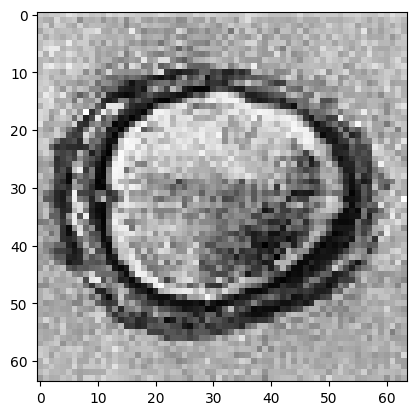

In [10]:
import numpy as np

def minmax_normalize_matrix(matrix):
    min_vals = np.min(matrix, axis=0)
    max_vals = np.max(matrix, axis=0)
    normalized_matrix = (matrix - min_vals) / (max_vals - min_vals)
    return normalized_matrix

normalized_fmri_train = minmax_normalize_matrix(x_train)
import matplotlib.pyplot as plt
plt.imshow(normalized_fmri_train[100][:,:,15,0],cmap='gray')

In [11]:
normalized_fmri_train = minmax_normalize_matrix(x_train)
normalized_fmri_test = minmax_normalize_matrix(x_test)

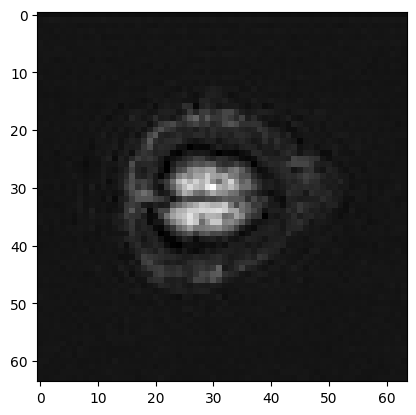

In [ ]:
# plt.imshow(resize_volume(x_train[num][:,:,:,0])[:,:,30],cmap='gray')

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


import os
import random
import numpy as np
import nibabel as nib
from scipy import ndimage
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

print ("nums GPU",len(tf.config.list_physical_devices('GPU')))

nums GPU 1


In [13]:
SEED=123456
os.environ['PYTHONHASHSEED']=str(SEED)
os.environ['TF_CUDNN_DETERMINISTIC']='1'
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [14]:
class SamplingLayer(layers.Layer):
    def call(self, inputs):
        zMean,zLogVar=inputs
        batch=tf.shape(zMean)[0]
        dim=tf.shape(zMean)[1]
        epsilon=tf.keras.backend.random_normal(shape=(batch,dim))
        return zMean + tf.exp(0.5 * zLogVar) * epsilon

In [15]:
def buildEncoder(latentDim, encoderInputs):

    l1 = keras.models.Sequential([
        layers.Conv3D(128, 3, activation="relu", strides=2, padding="same"),
        layers.Conv3D(64, 3, activation="relu", strides=2, padding="same"),
        layers.Flatten(),
        layers.Dense(256, activation="relu")
    ])

    x = l1(encoderInputs)

    zMean = layers.Dense(latentDim, name="z_mean")(x)

    zLogVar = layers.Dense(latentDim,name="z_log_var")(x)

    z =  SamplingLayer()([zMean, zLogVar])

    return keras.Model(encoderInputs, [zMean, zLogVar, z], name="encoder")

encoderInputs = keras.Input(shape=(64, 64, 32, 1))
encoder = buildEncoder(3,encoderInputs)
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 32,  0           []                               
                                 1)]                                                              
                                                                                                  
 sequential (Sequential)        (None, 256)          33779520    ['input_1[0][0]']                
                                                                                                  
 z_mean (Dense)                 (None, 3)            771         ['sequential[0][0]']             
                                                                                                  
 z_log_var (Dense)              (None, 3)            771         ['sequential[0][0]']       

In [16]:
def buildDecoder(latentInputs):
    l1 = keras.models.Sequential([
        layers.Dense(16*16*8*32, activation="relu", input_shape=(latentInputs.shape[1],)),
        layers.Reshape((16,16,8,32)),
        layers.Conv3DTranspose(filters=128, kernel_size=3, activation="relu", strides=2, padding="same"),
        layers.Conv3DTranspose(filters=64, kernel_size=3, activation="relu", strides=2, padding="same"),
        layers.Conv3DTranspose(filters=1, kernel_size=3, activation="sigmoid", padding="same")
    ])

    return keras.Model(latentInputs, l1(latentInputs), name="decoder")

latentInputs = keras.Input(shape=(3,))
decoder = buildDecoder(latentInputs)
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3)]               0         
                                                                 
 sequential_1 (Sequential)   (None, 64, 64, 32, 1)     595841    
                                                                 
Total params: 595,841
Trainable params: 595,841
Non-trainable params: 0
_________________________________________________________________


In [17]:
def reconstructionLoss(data, reconstructed):
    return tf.reduce_mean(
        tf.reduce_sum(
            keras.losses.binary_crossentropy(data, reconstructed),
            axis=(1,2)
        )
    )
def klDivergenceLoss(zMean, zLogVar):
    return tf.reduce_mean(
        tf.reduce_sum(
            -0.5 * (1 + zLogVar - tf.square(zMean) - tf.exp(zLogVar)),
            axis=1
        )
    )
def calcTotalLoss(data, reconstructed, zMean, zLogVar):
    loss1 = reconstructionLoss(data, reconstructed)
    loss2 = klDivergenceLoss(zMean,zLogVar)
    klWeight = 3.0
    return loss1, loss2, loss1 + klWeight * loss2

In [18]:
class CVAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(CVAE, self).__init__(**kwargs)
        self.encoder=encoder
        self.decoder=decoder

        self.totalLossTracker= keras.metrics.Mean(name="total_loss")
        self.ceLossTracker= keras.metrics.Mean(name="ce_loss")
        self.klLossTracker= keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return[
            self.totalLossTracker,
            self.ceLossTracker,
            self.klLossTracker
        ]


    def train_step(self, data):
        with tf.GradientTape() as tape:
            zMean, zLogVar, z = self.encoder(data)
            reconstruction = self.decoder(z)
            ceLoss, klLoss, totalLoss = calcTotalLoss(data,reconstruction,zMean,zLogVar)

        grads = tape.gradient(totalLoss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.totalLossTracker.update_state(totalLoss)
        self.ceLossTracker.update_state(ceLoss)
        self.klLossTracker.update_state(klLoss)

        return{
            "total_loss": self.totalLossTracker.result(),
            "ce_loss": self.ceLossTracker.result(),
            "kl_loss": self.klLossTracker.result()
        }

In [19]:
dataset = np.concatenate([normalized_fmri_train, normalized_fmri_test], axis=0)
dataset.shape

(4828, 64, 64, 32, 1)

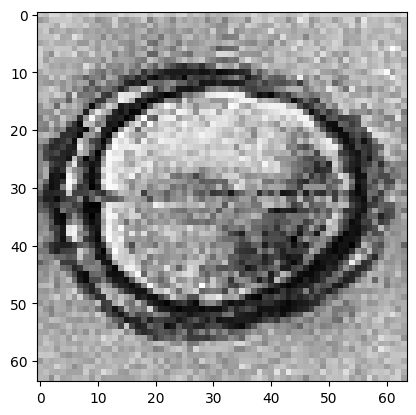

In [20]:
plt.imshow(dataset[22][:,:,12,0],cmap='gray')

In [21]:
cvae=CVAE(encoder, decoder)
cvae.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001))
history=cvae.fit(dataset,epochs=20,batch_size=10)
print(dataset.shape)

Epoch 1/20
483/483 [==============================] - 105s 203ms/step - total_loss: 2838.0073 - ce_loss: 2837.9114 - kl_loss: 0.0321
Epoch 2/20
483/483 [==============================] - 98s 203ms/step - total_loss: 2796.5715 - ce_loss: 2790.4766 - kl_loss: 2.0313
Epoch 3/20
483/483 [==============================] - 98s 203ms/step - total_loss: 2752.6853 - ce_loss: 2745.4250 - kl_loss: 2.4205
Epoch 4/20
483/483 [==============================] - 98s 202ms/step - total_loss: 2716.7649 - ce_loss: 2706.8132 - kl_loss: 3.3172
Epoch 5/20
483/483 [==============================] - 98s 202ms/step - total_loss: 2686.5393 - ce_loss: 2673.8521 - kl_loss: 4.2289
Epoch 6/20
483/483 [==============================] - 98s 203ms/step - total_loss: 2664.2949 - ce_loss: 2649.5708 - kl_loss: 4.9070
Epoch 7/20
483/483 [==============================] - 98s 202ms/step - total_loss: 2647.6924 - ce_loss: 2631.2427 - kl_loss: 5.4836
Epoch 8/20
483/483 [==============================] - 98s 202ms/step - tota

In [ ]:
plt.figure(figsize=(10,9))
plt.plot(history.history.get("total_loss"), label= "total loss")
plt.plot(history.history.get("ce_loss"), label= "reconstruction loss")
# plt.plot(history.history.get("kl_loss"), label= "kl loss")
plt.legend()

1/1 [==============================] - 0s 29ms/step


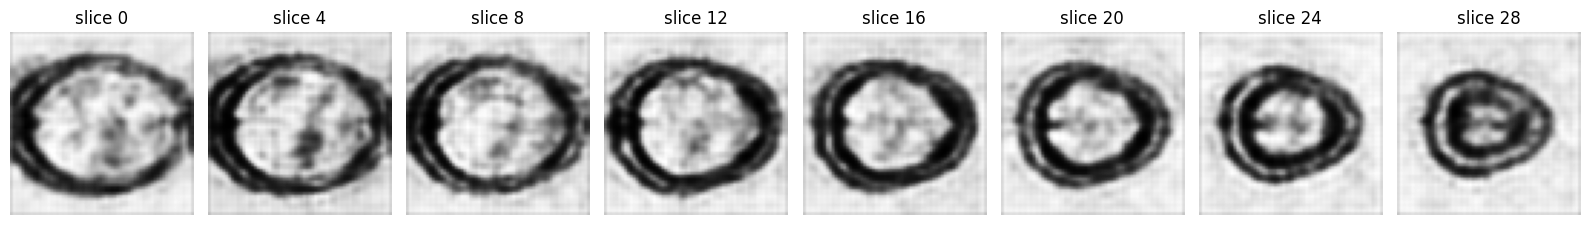

In [24]:
synth= cvae.decoder.predict([[1.5, 2, 2]])
new_fmri = synth.reshape((64, 64, 32))

fig, axes = plt.subplots(1, 8, figsize=(16, 4))
chunk_size = new_fmri.shape[2]//8
for i in range(8):

    index = i * chunk_size
    sub_data = new_fmri[:, :, index]

    axes[i].imshow(sub_data , cmap='gray')
    axes[i].set_title(f'slice {index}')
    axes[i].axis('off')

plt.tight_layout()
# plt.savefig('my_figure1.png')
plt.show()

1/1 [==============================] - 1s 1s/step


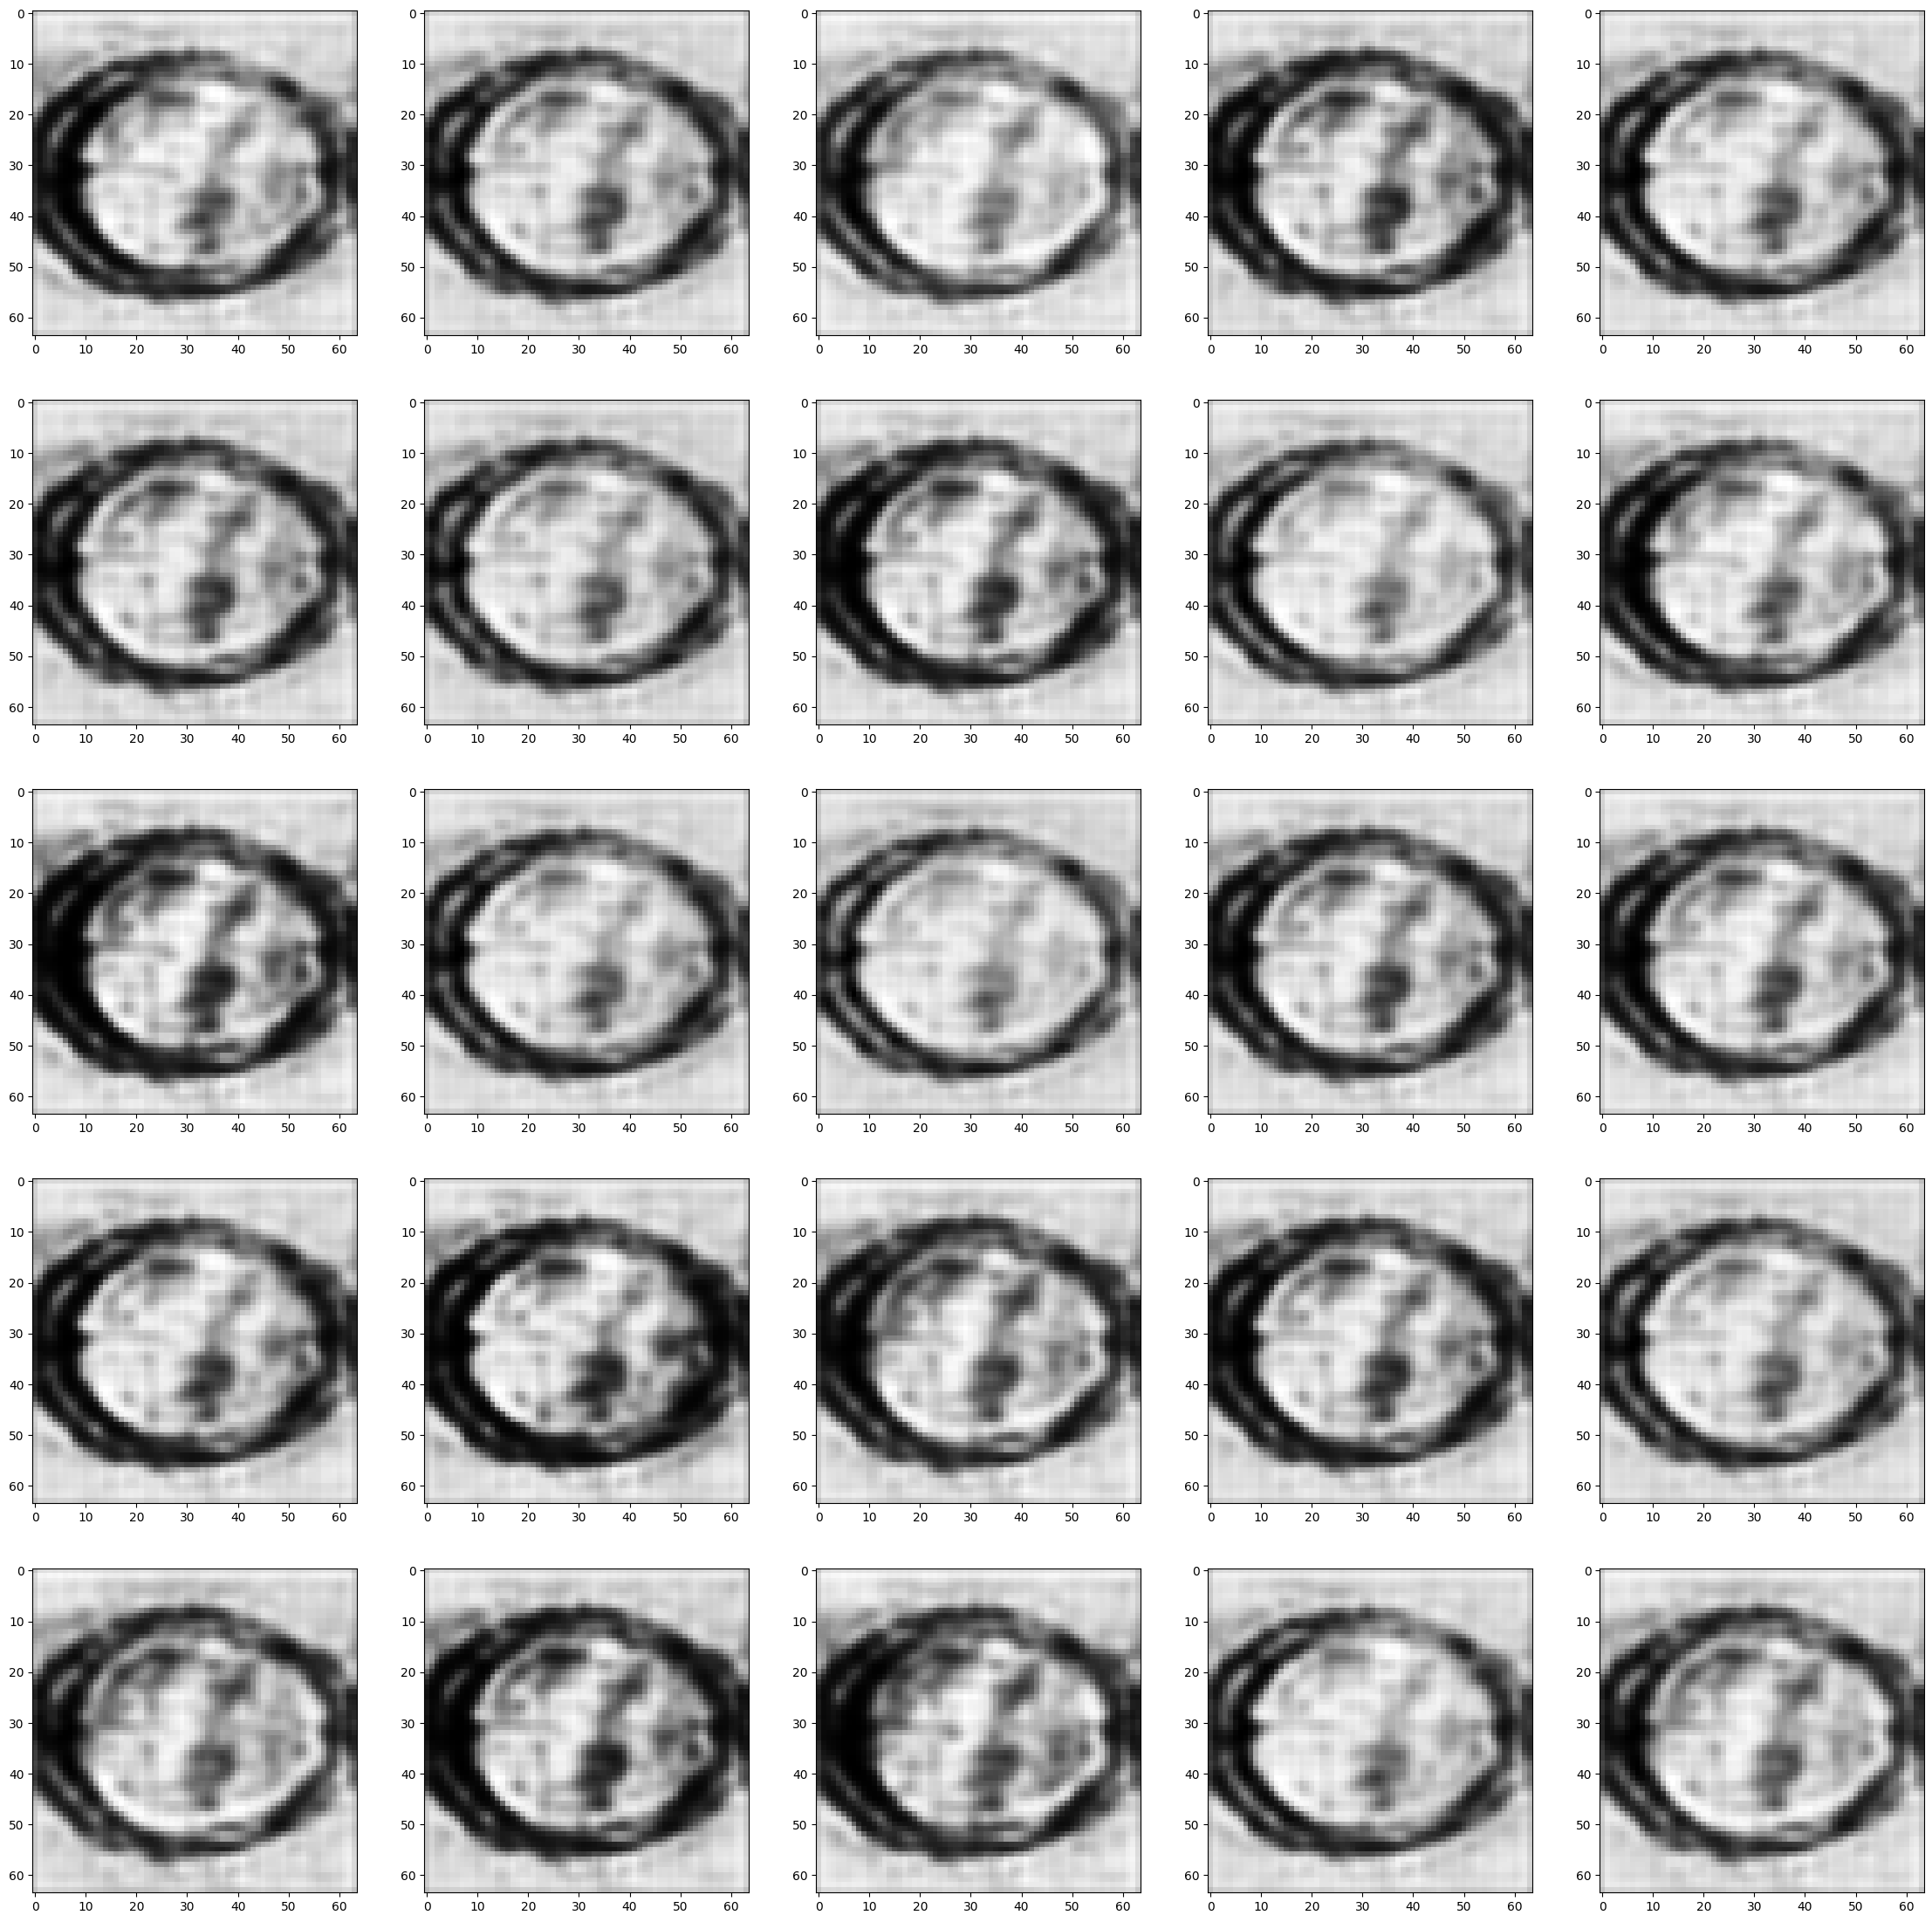

In [25]:
z = np.random.normal(loc=1.7, scale=0.5, size=(25,3))
synth= cvae.decoder.predict(z)
plt.figure(figsize=(28,28))
for i in range(25):
    plt.subplot(5, 5, i+1)
    new_t=synth[i].reshape(64,64,32)
    plt.imshow(new_t[:,:,4], cmap='gray')


plt.show()

In [ ]:
fmri_test[0][:,:,:,0].shape
nor_test_fmri = minmax_normalize_matrix(fmri_test)

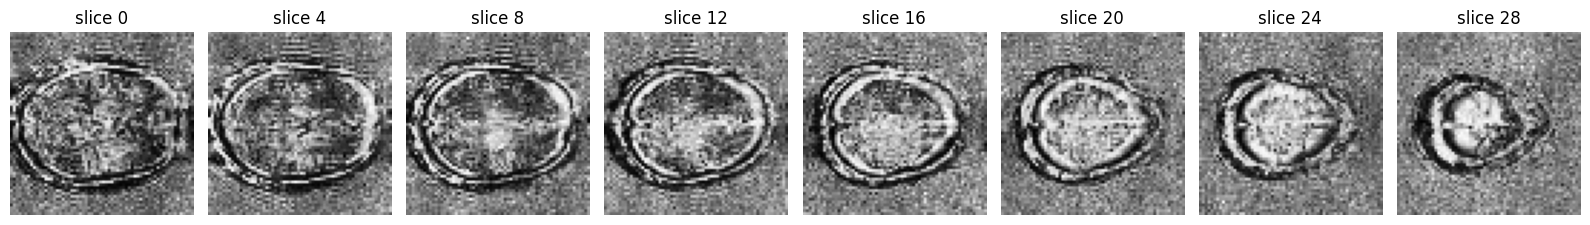

In [ ]:
new_fmritest = nor_test_fmri[200][:,:,:,0]

fig, axes = plt.subplots(1, 8, figsize=(16, 4))
chunk_size = new_fmritest.shape[2]//8
for i in range(8):

    index = i * chunk_size
    sub_data = new_fmritest[:, :, index]

    axes[i].imshow(sub_data , cmap='gray')
    axes[i].set_title(f'slice {index}')
    axes[i].axis('off')

plt.tight_layout()
# plt.savefig('my_figure1.png')
plt.show()

In [ ]:
from skimage.metrics import structural_similarity as ssim

ms_ssim = ssim(new_fmri[:,:,14], nor_test_fmri[100][:,:,14,0], multichannel=True)

print(f"MS-SSIM: {ms_ssim}")

MS-SSIM: 0.2641286253929138


<ipython-input-75-e672c236c1d8>:3: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ms_ssim = ssim(new_fmri[:,:,14], nor_test_fmri[100][:,:,14,0], multichannel=True)


calculate ms-ssim, mmd, psnr here

In [1]:
from warnings import warn
import numpy as np
import numexpr as ne
from scipy.ndimage import uniform_filter, gaussian_filter
from scipy.ndimage.filters import convolve

from skimage.util.dtype import dtype_range
from skimage.util.arraycrop import crop
from skimage._shared.utils import warn, check_shape_equality

def _as_floats(image0, image1):

    float_type = np.result_type(image0.dtype, image1.dtype, np.float32)
    image0 = np.asarray(image0, dtype=float_type)
    image1 = np.asarray(image1, dtype=float_type)
    return image0, image1

def structural_similarity(im1, im2,
                          *,
                          win_size=None, gradient=False, data_range=None,
                          multichannel=True, gaussian_weights=False,
                          full=False, **kwargs):
    check_shape_equality(im1, im2)

    if multichannel:
        # loop over channels
        args = dict(win_size=win_size,
                    gradient=gradient,
                    data_range=data_range,
                    multichannel=False,
                    gaussian_weights=gaussian_weights,
                    full=full)
        args.update(kwargs)
        nch = im1.shape[-1]
        mssim = np.empty(nch)
        cs = np.empty(nch)
        if gradient:
            G = np.empty(im1.shape)
        if full:
            S = np.empty(im1.shape)
        for ch in range(nch):
            ch_result = structural_similarity(im1[..., ch],
                                              im2[..., ch], **args)
            if gradient and full:
                mssim[..., ch], cs[..., ch], G[..., ch], S[..., ch] = ch_result
            elif gradient:
                mssim[..., ch], cs[..., ch], G[..., ch] = ch_result
            elif full:
                mssim[..., ch], cs[..., ch], S[..., ch] = ch_result
            else:
                mssim[..., ch], cs[..., ch] = ch_result
        mssim = mssim.mean()
        cs = cs.mean()

        if gradient and full:
            return mssim, cs, G, S
        elif gradient:
            return mssim, cs, G
        elif full:
            return mssim, cs, S
        else:
            return mssim, cs

    K1 = kwargs.pop('K1', 0.01)
    K2 = kwargs.pop('K2', 0.03)
    sigma = kwargs.pop('sigma', 1.5)
    if K1 < 0:
        raise ValueError("K1 must be positive")
    if K2 < 0:
        raise ValueError("K2 must be positive")
    if sigma < 0:
        raise ValueError("sigma must be positive")
    use_sample_covariance = kwargs.pop('use_sample_covariance', True)

    if gaussian_weights:
        # Set to give an 11-tap filter with the default sigma of 1.5 to match
        # Wang et. al. 2004.
        truncate = 3.5

    if win_size is None:
        if gaussian_weights:
            # set win_size used by crop to match the filter size
            r = int(ne.evaluate("truncate * sigma + 0.5"))  # radius as in ndimage
            win_size = ne.evaluate("2 * r + 1")
        else:
            win_size = 7   # backwards compatibility

    if np.any((np.asarray(im1.shape) - win_size) < 0):
        raise ValueError(
            "win_size exceeds image extent.  If the input is a multichannel "
            "(color) image, set multichannel=True.")

    if not (win_size % 2 == 1):
        raise ValueError('Window size must be odd.')

    if data_range is None:
        if im1.dtype != im2.dtype:
            warn("Inputs have mismatched dtype.  Setting data_range based on "
                 "im1.dtype.", stacklevel=2)
        dmin, dmax = dtype_range[im1.dtype.type]
        data_range = dmax - dmin

    ndim = im1.ndim

    if gaussian_weights:
        filter_func = gaussian_filter
        filter_args = {'sigma': sigma, 'truncate': truncate}
    else:
        filter_func = uniform_filter
        filter_args = {'size': win_size}

    # ndimage filters need floating point data
    im1 = im1.astype(np.float64)
    im2 = im2.astype(np.float64)

    NP = win_size ** ndim

    # filter has already normalized by NP
    if use_sample_covariance:
        cov_norm = NP / (NP - 1)  # sample covariance
    else:
        cov_norm = 1.0  # population covariance to match Wang et. al. 2004

    # compute (weighted) means
    ux = filter_func(im1, **filter_args)
    uy = filter_func(im2, **filter_args)

    # compute (weighted) variances and covariances
    uxx = filter_func(ne.evaluate("im1 * im1"), **filter_args)
    uyy = filter_func(ne.evaluate("im2 * im2"), **filter_args)
    uxy = filter_func(ne.evaluate("im1 * im2"), **filter_args)
    vx = ne.evaluate("cov_norm * (uxx - ux * ux)")
    vy = ne.evaluate("cov_norm * (uyy - uy * uy)")
    vxy = ne.evaluate("cov_norm * (uxy - ux * uy)")

    R = data_range
    C1 = ne.evaluate("(K1 * R) ** 2")
    C2 = ne.evaluate("(K2 * R) ** 2")

    A1, A2, B1, B2 = ((ne.evaluate("2 * ux * uy + C1"),
                       ne.evaluate("2 * vxy + C2"),
                       ne.evaluate("ux ** 2 + uy ** 2 + C1"),
                       ne.evaluate("vx + vy + C2")))
    D = ne.evaluate("B1 * B2")
    S = ne.evaluate("(A1 * A2) / D")

    # to avoid edge effects will ignore filter radius strip around edges
    pad = (win_size - 1) // 2

    # compute (weighted) mean of ssim
    mssim = 2*crop(S, pad).mean()
    cs=2*np.mean(ne.evaluate("A2/B2")) #used for multiscaled

    if gradient:
        # The following is Eqs. 7-8 of Avanaki 2009.
        grad = filter_func(ne.evaluate("A1 / D"), **filter_args) * im1
        grad += filter_func(ne.evaluate("-S / B2"), **filter_args) * im2
        grad += filter_func(ne.evaluate("(ux * (A2 - A1) - uy * (B2 - B1) * S) / D"),
                            **filter_args)
        grad *= (2 / im1.size)

        if full:
            return mssim, cs, grad, S
        else:
            return mssim, cs, grad
    else:
        if full:
            return mssim, cs, S
        else:
            return mssim, cs


def multiscale_structural_similarity(im1, im2,*,win_size=None, data_range=None, multichannel=True, gaussian_weights=False):
    check_shape_equality(im1, im2)
    weights = np.array([0.0448, 0.2856, 0.3001, 0.2363, 0.1333])
    levels = weights.size
    downsample_filter = np.ones((2, 2, 1)) / 4.0
    mssim = np.array([])
    mcs = np.array([])

    for _ in range(levels):
        ssim, cs = structural_similarity(im1, im2, win_size=win_size,data_range=data_range, gaussian_weights=gaussian_weights)
        mssim = np.append(mssim, ssim)
        mcs = np.append(mcs, cs)
        filtered = [convolve(im, downsample_filter, mode='reflect') for im in [im1, im2]]
        im1, im2 = [x[::2, ::2, :] for x in filtered]

    return (np.prod(mcs[0:levels-1] ** weights[0:levels-1]) * (mssim[levels-1] ** weights[levels-1]))


def peak_signal_noise_ratio(image_true, image_test, *, data_range=None):
    check_shape_equality(image0, image1)
    image0, image1 = _as_floats(image0, image1)
    return np.mean(ne.evaluate("(image0 - image1) ** 2"), dtype=np.float64)

<ipython-input-1-0b807489f27a>:5: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve


In [ ]:
im1 = np.expand_dims(new_fmri[:,:,14],axis=-1)
im3 = new_fmri[:,:,14]
im2 = nor_test_fmri[100][:,:,14,:]
ssim, cs = structural_similarity(im1, im2)

In [ ]:
check_shape_equality(im1, im2)
weights = np.array([0.0448, 0.2856, 0.3001, 0.2363, 0.1333])
levels = weights.size
downsample_filter = np.ones((2, 2, 1)) / 4.0
mssim = np.array([])
mcs = np.array([])
for _ in range(levels):
    # ssim, cs = structural_similarity(im1, im2)
    mssim = np.append(mssim, ssim)
    mcs = np.append(mcs, cs)
    filtered = [convolve(im, downsample_filter, mode='reflect') for im in [im1, im2]]
    im1, im2 = [x[::2, ::2, :] for x in filtered]
np.prod(mcs[0:levels-1] ** weights[0:levels-1]) * (mssim[levels-1] ** weights[levels-1])

0.5652897135918856

In [ ]:
cvae.save_weights('/content/drive/MyDrive/EEG_GAN/my_cvae_weights_nolabel_MIpost1')